# Homework 1

Solve Ch2 Problem 2 (parts b through d) from *Probabilistic Robots* by Thrun et al 

## Part 2b

Write a simulator that can randomly generate sequences of "weathers" from the state transition function. 

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Transition matrix: 
# Rows represent today's weather in the sequence of sunny/cloudy/rainy
# Columns represent tomorrow's weather in the sequence of sunny/cloudy/rainy
transitionMatrix = np.array([[0.8, 0.2, 0], 
                            [0.4, 0.4, 0.2], 
                            [0.2, 0.6, 0.2]])
# List of States
states = ['sunny','cloudy','rainy']

In [3]:
def weather_simulator(iterations):
    # Initialize at random state
    currState = random.choice(states)
    weather = [currState]

    for i in range(iterations-1):
        if currState == 'sunny':
            nextStateProb = transitionMatrix[0]
        elif currState == 'cloudy':
            nextStateProb = transitionMatrix[1]
        elif currState == 'rainy':
            nextStateProb = transitionMatrix[2]

        # Get a random next state based on the current state
        nextState = random.choices(states, nextStateProb)
        weather.append(nextState[0])
        
        currState = nextState[0]
        
    return weather

In [11]:
# Simulate 5 days of weather based on the transition matrix
weatherSequence = weather_simulator(5)
print(weatherSequence)

['sunny', 'sunny', 'cloudy', 'cloudy', 'sunny']


## Part 2c
Use the simulator to determine the stationary distribution of this Markov chain. 

The stationary distribution measures the probability that a random day will be sunny, cloudy, or rainy.

In [5]:
# Count the number of occurrences of each weather state and divide by the total
# to get the stationary distribution
def stationary_distribution(sequence):
    sunnyDays = sequence.count('sunny')
    cloudyDays = sequence.count('cloudy')
    rainyDays = sequence.count('rainy')

    total = len(sequence)
    return {
        "sunny": sunnyDays/total,
        "cloudy": cloudyDays/total,
        "rainy": rainyDays/total
    }

In [12]:
# Use a large number to get an estimated distribution
weatherSequenceLong = weather_simulator(10000)
print(stationary_distribution(weatherSequenceLong))

{'sunny': 0.6388, 'cloudy': 0.2901, 'rainy': 0.0711}


## Part 2c Discussion
#### (i)     How to initialize the simulation
After defining the state transition matrix and the list of states, the weather simulation was initialized to a random state because the stationary distribution will arrive at the same value regardless of the initial state.

#### (ii) How many transitions should be considered before taking a result
To determine the number of transitions to consider, the simulator results were plotted with respect to the number of days considered.

Looking at this plot, it was determined that the fluctuations in probability reduced enough to be considered noise after about **2000 sample days**.

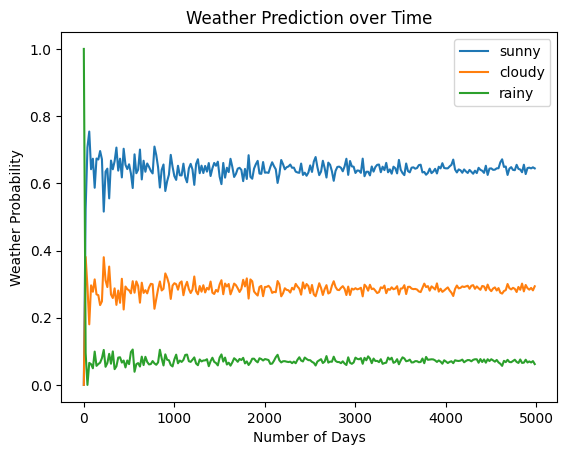

In [7]:
# create plot of weather probability as the number of days increases
days = []
probSunny = []
probCloudy = []
probRainy = []
for day in range(1,5000,20):
    prob = stationary_distribution(weather_simulator(day))
    days.append(day)
    probSunny.append(prob.get('sunny'))
    probCloudy.append(prob.get('cloudy'))
    probRainy.append(prob.get('rainy'))

plt.plot(days, probSunny, label = "sunny")
plt.plot(days, probCloudy, label = "cloudy")
plt.plot(days, probRainy, label = "rainy")
plt.legend()
plt.xlabel('Number of Days')
plt.ylabel('Weather Probability')
plt.title('Weather Prediction over Time')
plt.show()

#### (iii)   How many simulation runs were conducted to arrive at the statistics for the stationary distribution
Initially 10,000 simulated days were used to arrive at a stationary distribution for weather predictions. After plotting the results above, that number can be reduced to **2000 sample days** and still receive an accurate result

In [8]:
stationary_distribution(weather_simulator(2000))

{'sunny': 0.654, 'cloudy': 0.2745, 'rainy': 0.0715}

## Part 2d
Can you devise a closed-form solution to calculate the stationary distribution based on the state transition matrix above?

Perform the diagonalization of the state matrix A to get the same result

In [9]:
# Any state-space representation can be diagonalized through a similarity transform
# specified by the eigenvectors of the state transition matrix A
A = np.transpose(transitionMatrix) # state matrix A

(eVals, eVects) = np.linalg.eig(A) # get eigenvalues and eigenvectors
eVectsInv = np.linalg.inv(eVects) # Inverse of eigenvector array
D = np.diag(eVals) # diagonal eigenvalue array

eValsLim = np.round(np.linalg.matrix_power(D, 1000000)) # Limit of eigenvalue array

In [10]:
# Initialize as sunny weather
day0 = transitionMatrix[0].reshape(3,1)
print("\nSunny: \n", np.linalg.multi_dot((eVects, eValsLim, eVectsInv, day0)))

# Initialize as cloudy weather
day0 = transitionMatrix[1].reshape(3,1)
print("\nCloudy: \n", np.linalg.multi_dot((eVects, eValsLim, eVectsInv, day0)))

# Initialize as rainy weather
day0 = transitionMatrix[2].reshape(3,1)
print("\nRainy: \n", np.linalg.multi_dot((eVects, eValsLim, eVectsInv, day0)))


Sunny: 
 [[0.64285714]
 [0.28571429]
 [0.07142857]]

Cloudy: 
 [[0.64285714]
 [0.28571429]
 [0.07142857]]

Rainy: 
 [[0.64285714]
 [0.28571429]
 [0.07142857]]


Independent of the initial state, the distribution converges to the same array - which indicates that this is the stationary distribution found through the diagonalization of the state matrix.